In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [165]:
df=pd.read_csv('tested.csv')

In [166]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [169]:
df.shape

(418, 12)

In [170]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [171]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [172]:
df=df.drop(columns=['Cabin'])

In [173]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [174]:
remaining_null_values = df.isnull().sum()
df_shape = df.shape
df_shape, remaining_null_values

((418, 11),
 PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

In [175]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

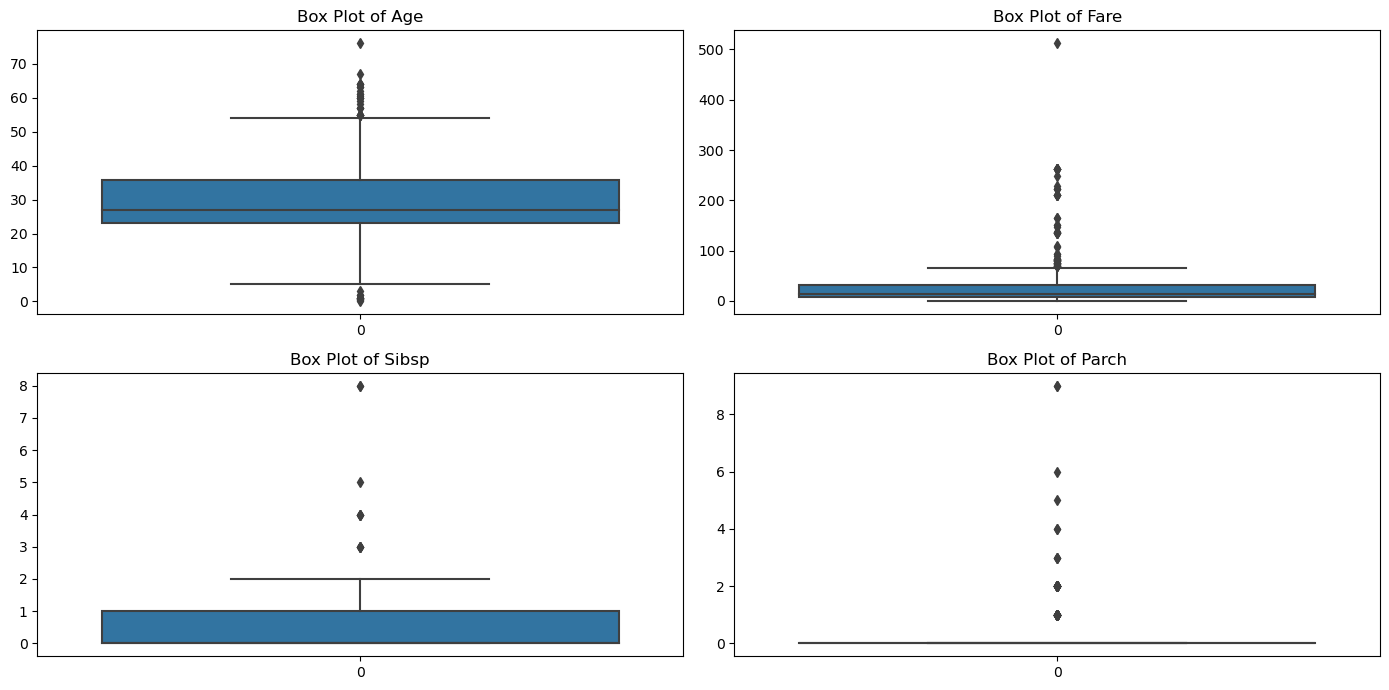

In [176]:
plt.figure(figsize=(14, 7))

plt.subplot(2,2,1)
sns.boxplot(df['Age'])
plt.title('Box Plot of Age')

plt.subplot(2,2,2)
sns.boxplot(df['Fare'])
plt.title('Box Plot of Fare')

plt.subplot(2,2,3)
sns.boxplot(df['SibSp'])
plt.title('Box Plot of Sibsp')

plt.subplot(2,2,4)
sns.boxplot(df['Parch'])
plt.title('Box Plot of Parch')

plt.tight_layout()
plt.show()

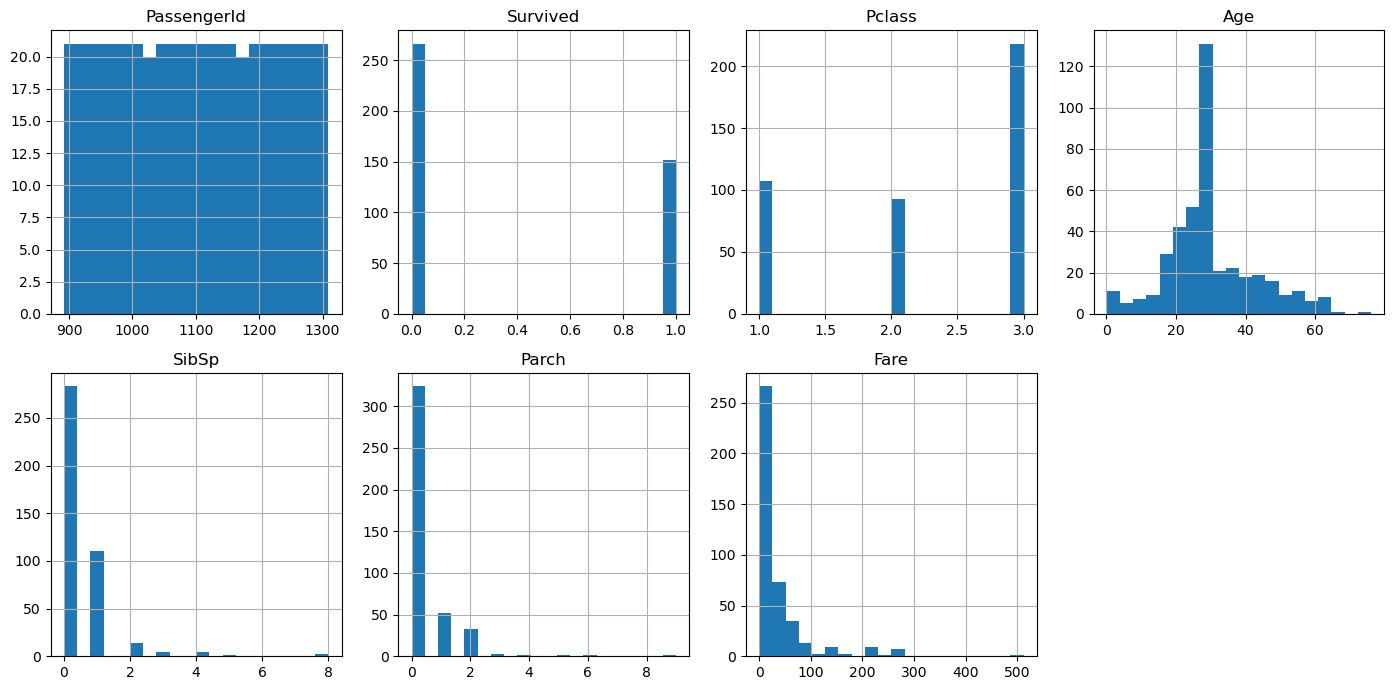

In [177]:
df.hist(bins=20, figsize=(14,7), layout=(2,4))
plt.tight_layout()
plt.show()

In [178]:
Q1_age=df['Age'].quantile(0.25)
Q3_age= df['Age'].quantile(0.75)
IQR_age=Q3_age-Q1_age
IQR_age
lower_bound=Q1_age-1.5*IQR_age
upper_bound=Q3_age+1.5*IQR_age
df=df[(df['Age']>= lower_bound)&(df['Age']<= upper_bound)]

In [179]:
Q1_fare=df['Fare'].quantile(0.25)
Q3_fare= df['Fare'].quantile(0.75)
IQR_fare=Q3_fare-Q1_fare
IQR_fare
lower_bound1=Q1_fare-1.5*IQR_fare
upper_bound1=Q3_fare+1.5*IQR_fare
df=df[(df['Fare']>= lower_bound1)&(df['Fare']<= upper_bound1)]

In [180]:
df=df[(df['SibSp']<= 8) & (df['Parch']<=8)]
new_shape=df.shape
new_shape

(333, 11)

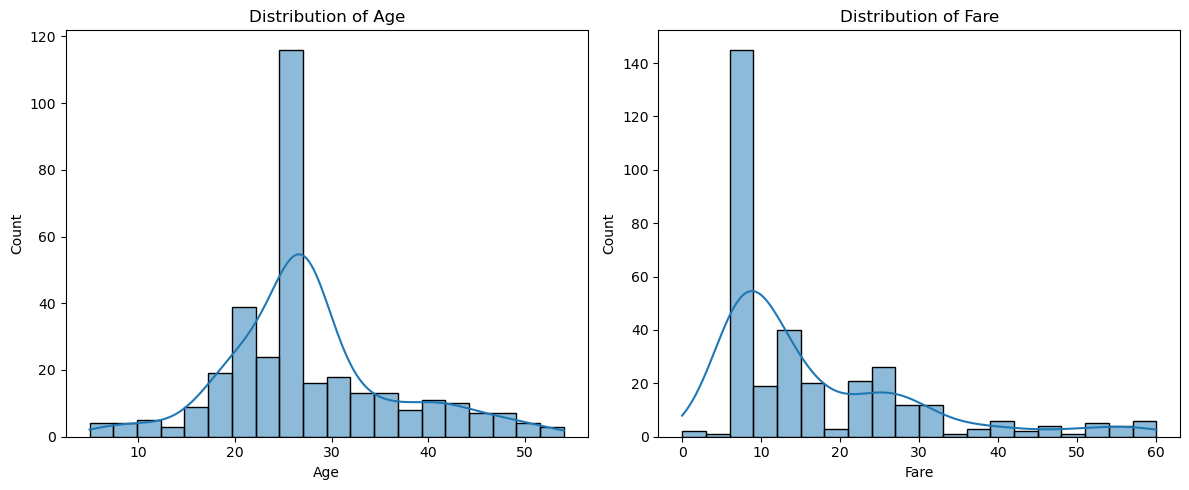

In [181]:
plt.figure(figsize=(12,5))
#distribution of Age and Fare after cleaning
plt.subplot(1,2,1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(1,2,2)
sns.histplot(df['Fare'], bins=20, kde=True)
plt.title('Distribution of Fare')
plt.tight_layout()
plt.show()

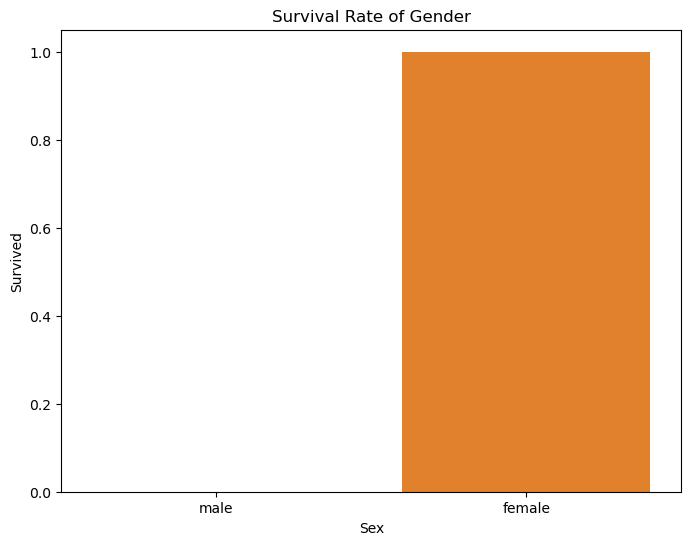

In [182]:
#understanding the distribution rate by gender_survival
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate of Gender')
plt.show()

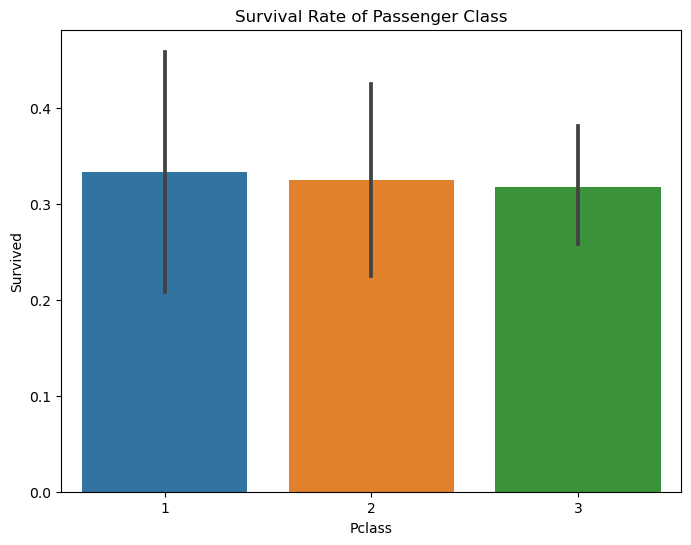

In [183]:

plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate of Passenger Class')
plt.show()

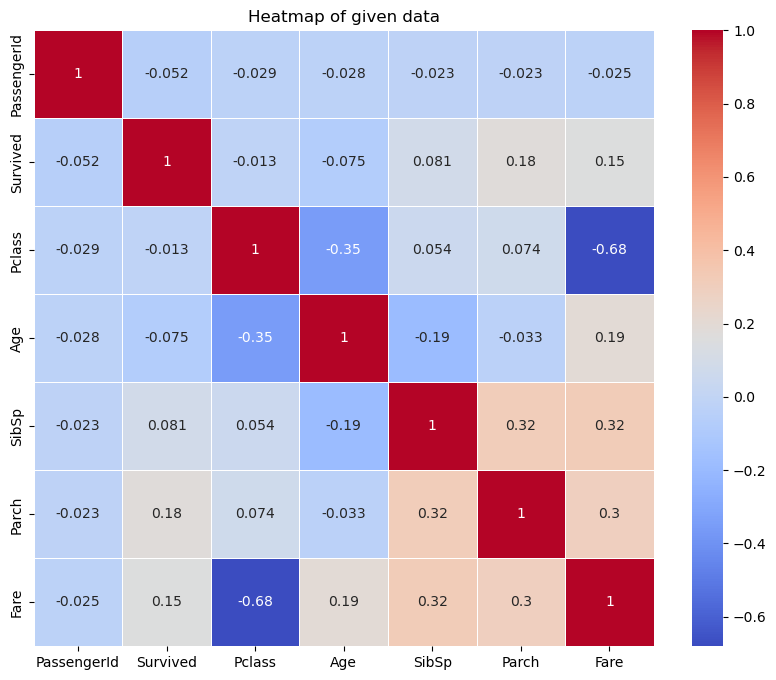

In [184]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap of given data')
plt.show()

In [185]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Sex']=df['Sex'].map({'male':1,'female':0})
df=pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,1
5,897,0,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,0,1


## using Random forest to handle categorical and numeric vairables given the nature of dataset

In [186]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [187]:
X=df.drop(columns=['Survived','Name','Ticket','PassengerId'])
y=df['Survived']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [189]:
random_forest = RandomForestClassifier(n_estimators=10,max_depth=3, min_samples_leaf=25,max_features='sqrt', random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=25, n_estimators=10,
                       random_state=42)

In [190]:
y_pred = random_forest.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy:{acc:.4f}')
cv_scores= cross_val_score(random_forest, X, y, cv=5)
print(f'Cross Validation Accuracy: {np.mean(cv_scores):.4f} ')

Random Forest Accuracy:0.6716
Cross Validation Accuracy: 0.9547 


In [191]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.67      1.00      0.80        45
           1       0.00      0.00      0.00        22

    accuracy                           0.67        67
   macro avg       0.34      0.50      0.40        67
weighted avg       0.45      0.67      0.54        67



In [192]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Confusion Matrix: [[45  0]
 [22  0]]


In [194]:
import joblib
joblib.dump(random_forest, 'titanic_classification.pkl')

['titanic_classification.pkl']